In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [6]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [7]:
df.sample(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
20683,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21622,7,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
5002,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24560,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14992,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

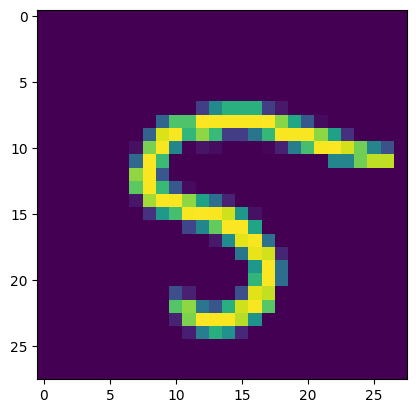

In [8]:
# let's see any image
import matplotlib.pyplot as plt
plt.imshow(df.iloc[20971, 1:].values.reshape(28, 28))
plt.show()

In [8]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [22]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
y_pred = knn.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.9437797619047619

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [13]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)

In [15]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [16]:
X_train_pca.shape

(8400, 100)

In [17]:
X_test_pca.shape

(33600, 100)

In [18]:
knn.fit(X_train_pca, y_train)

KNeighborsClassifier()

In [22]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test_pca)

In [23]:
accuracy_score(y_pred, y_test)

0.9289880952380952

In [47]:
for i in range(1, 785):
    pca = PCA(n_components=i)
    
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    knn.fit(X_train_pca, y_train)
    
    y_pred = knn.predict(X_test_pca)
    
    print(accuracy_score(y_test, y_pred))

0.2523809523809524
0.32705357142857144
0.5040178571428572
0.654375
0.7205952380952381
0.8105059523809524
0.8236607142857143
0.8480059523809523
0.8613392857142858
0.8829761904761905
0.8901785714285714
0.8932142857142857
0.898720238095238
0.9068452380952381
0.9128273809523809
0.9141071428571429
0.9144047619047619
0.9151488095238095
0.9169642857142857
0.919702380952381
0.9207738095238095
0.9216666666666666
0.9216369047619047
0.9208928571428572
0.9229166666666667
0.9235119047619048
0.9231547619047619
0.9233333333333333
0.9256845238095238
0.9264583333333334
0.9252083333333333
0.9251785714285714
0.9255357142857142
0.9278571428571428
0.9289880952380952
0.9292559523809524
0.9302976190476191
0.9302976190476191
0.9302976190476191
0.9305654761904761
0.9302678571428571
0.93125
0.9301190476190476
0.9304166666666667
0.9304464285714286
0.9305059523809524
0.9305654761904761
0.9314285714285714
0.9304761904761905
0.9307142857142857
0.9308630952380952
0.930625
0.9301488095238095
0.9300595238095238
0.9294

KeyboardInterrupt: 

In [24]:
# 2D cordinate system

pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [28]:
import plotly.express as px
y_train_pca = y_train.astype(str)
fig = px.scatter(x=X_train_pca[:,0],
                 y=X_train_pca[:,1],
                 color=y_train_pca,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [31]:
# transforming in 3D
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [32]:
import plotly.express as px
y_train_pca = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_pca[:,0], y=X_train_pca[:,1], z=X_train_pca[:,2],
              color=y_train_pca)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

